In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
#loading adult dataset
df_train = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
     na_values='?', 
     header=None)

#loading test dataset
df_test = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
    na_values='?', 
    index_col=None)

In [322]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [323]:
df_test.head()

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [212]:
with open('/Users/fainaburman/Downloads/adult.names') as f:
    print(f.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [324]:
#column names
col_labels = ['age',
              'workclass',
              'fnlwgt',
              'education',
              'education_num',
              'marital_status',
              'occupation',
              'relationship',
              'race',
              'sex',
              'capital_gain:',
              'capital_loss',
              'hours_per_week',
              'native_country', 
              '50K']
              
df_train.columns = col_labels
df_test = df_test.reset_index()
df_test.columns = col_labels

In [325]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain:,capital_loss,hours_per_week,native_country,50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [327]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain:,capital_loss,hours_per_week,native_country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [328]:
df_train.shape

(32561, 15)

In [329]:
df_test.shape

(16281, 15)

In [330]:
# checking the datatypes of all the columns in the data set
pd.DataFrame([df_train.dtypes], 
             index = ['train_set']).T 

,train_set
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [331]:
pd.DataFrame([df_test.dtypes], 
             index = ['test_set']).T 

,test_set
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [332]:
object_variables = []
for i in df_train.columns: 
    if df[i].dtypes == 'object':
        object_variables.append(i)

In [333]:
for v in object_variables:
    print(df_train[v].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [334]:
for v in object_variables:
    print(df_test[v].value_counts())

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64
 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: marital_status, dtype: int64
 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         2013
 Sales      

In [335]:
def check_missing_values(df): 
    df = df.apply(lambda x : x.replace(' ?',np.nan))
    count_missing = df.isnull().sum()
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': train_set.columns,
                                     'percent_missing': percent_missing, 
                                     'count_missing': count_missing})
    return df, missing_value_df

In [337]:
df_train, missing_value_df_train = check_missing_values(df_train)
df_test, missing_value_df_test = check_missing_values(df_test)

In [339]:
missing_value_df_train

,column_name,percent_missing,count_missing
age,age,0.000000,0
workclass,workclass,5.638647,1836
fnlwgt,fnlwgt,0.000000,0
education,education,0.000000,0
education_num,education_num,0.000000,0
marital_status,marital_status,0.000000,0
occupation,occupation,5.660146,1843
relationship,relationship,0.000000,0
race,race,0.000000,0
sex,sex,0.000000,0


In [340]:
missing_value_df_test

,column_name,percent_missing,count_missing
age,age,0.000000,0
workclass,workclass,5.914870,963
fnlwgt,fnlwgt,0.000000,0
education,education,0.000000,0
education_num,education_num,0.000000,0
marital_status,marital_status,0.000000,0
occupation,occupation,5.933296,966
relationship,relationship,0.000000,0
race,race,0.000000,0
sex,sex,0.000000,0


In [341]:
df_train.describe()

,age,fnlwgt,education_num,capital_gain:,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [231]:
df.dropna(inplace=True)
df_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [223]:
df = df.assign(dependant_variable=np.where(df['50K']==" >50K", 1,0))
df.dependant_variable.sum()/df.dependant_variable.count()

0.24081695331695332

In [227]:
df[df['workclass'].isnull() & 
   df['occupation'].isnull() & 
   df['native_country'].isnull()].age.count()

27

In [234]:
n_samples_before = df.shape[0]
n_samples_after = df.drop_duplicates().shape[0]

print(n_samples_before)
print(n_samples_after)
print("Duplicates: {:.2%}".format((n_samples_before - n_samples_after) / n_samples_before))

30161
30138
Duplicates: 0.08%


In [228]:
df[df['native_country'].isnull()].head(60)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain:,capital_loss,hours_per_week,native_country,50K,dependant_variable
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K,1
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K,1
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K,0
60,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K,0
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K,0
244,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,NaN,<=50K,0
248,45,Private,153141,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,NaN,<=50K,0
296,39,NaN,157443,Masters,14,Married-civ-spouse,NaN,Wife,Asian-Pac-Islander,Female,3464,0,40,NaN,<=50K,0
392,34,State-gov,98101,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,NaN,>50K,1
452,42,Private,197583,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,NaN,>50K,1


In [126]:
# Deleting the columns with missing data
# Deleting the rows with missing data
# Filling the missing data with a value – Imputation
# Imputation with an additional column
# Filling with a Regression Model

In [235]:
num_feat = df.select_dtypes(include=['int64']).columns
cat_feat = df.select_dtypes(include=['object']).columns

In [236]:
cat_feat

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', '50K'],
      dtype='object')

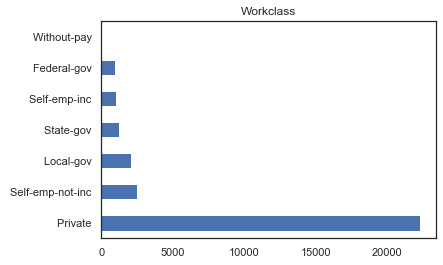

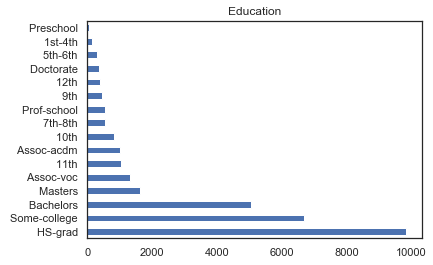

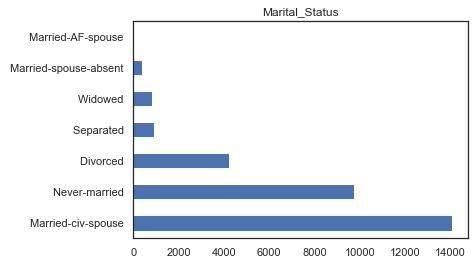

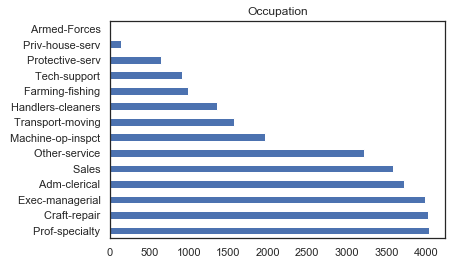

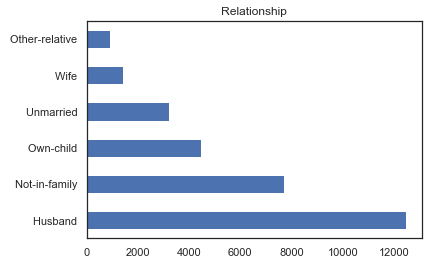

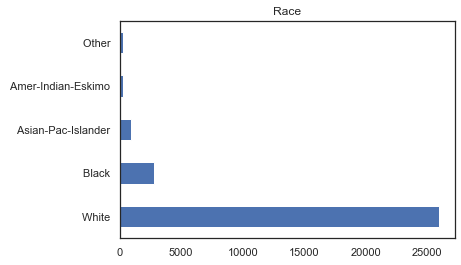

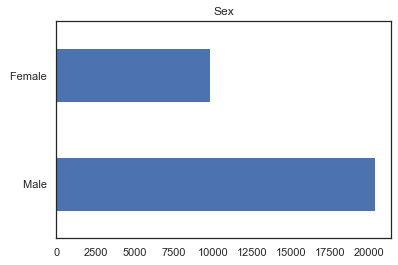

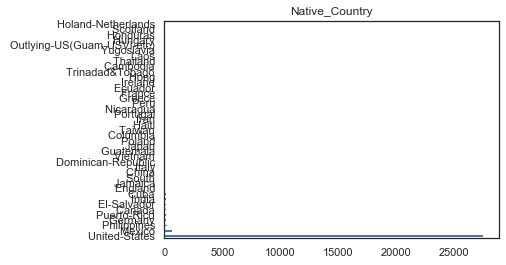

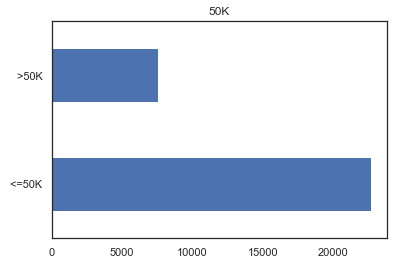

In [243]:
for feature in cat_feat:
    plt.title(feature.title())

    (df[feature]
         .value_counts()
         .plot(kind='barh'))

    plt.show()

Observations:

Quite large number of the race=White values

Quite large number of the workclass=Private values.

Quite large number of the natice_country=United-States values. This variable can be either ignore or replaced. with binary variable like from_united_states that will be equal to True if person from united states, and False otherwise.

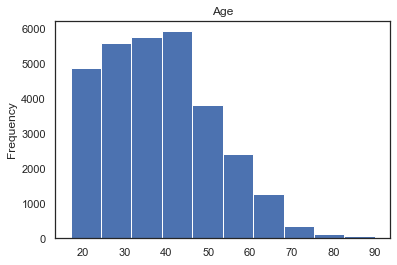

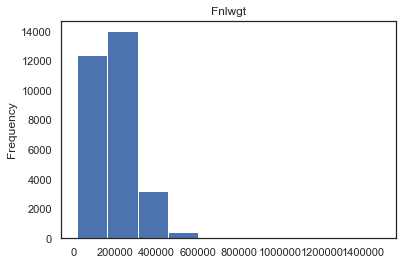

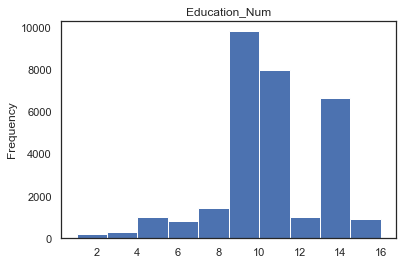

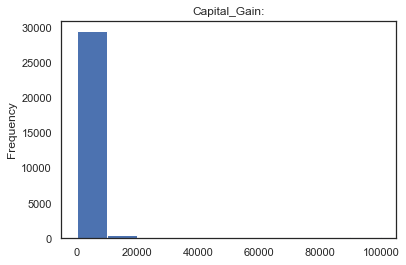

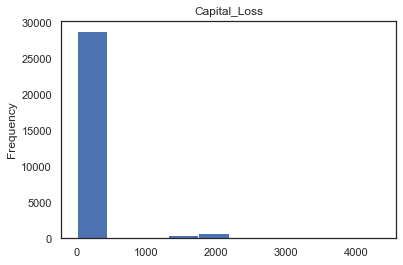

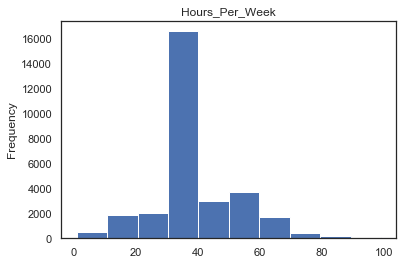

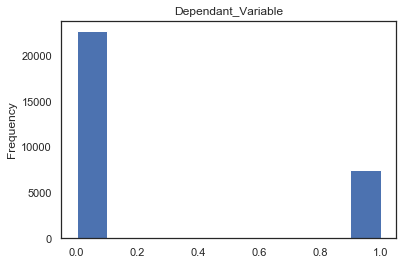

In [244]:
for feature, values in df[num_feat].iteritems():
    plt.title(feature.title())
    values.plot(kind='hist')
    plt.show()

Observations:

The hours_per_week has large spike where value equal to 40 which makes sense since it's the most common number of working hours per week for average person.

The capital_loss and capital_gain variables have large spike where value equal to zero. It's typicall that average person doesn't have additional incomes. It makes sense to see distribution without zero values for these columns.

The education_num column has two spikes. First spike around the number of years that it takes to complete school for the average person and the second one for university.

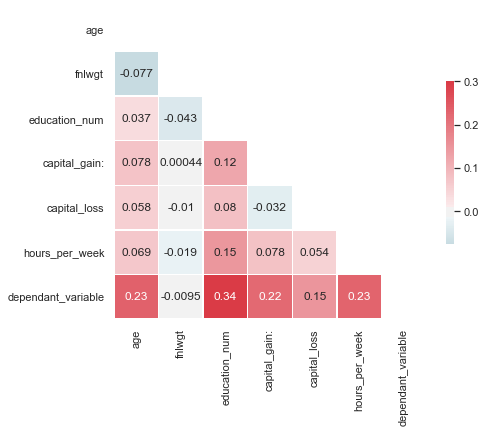

In [183]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[num_feat].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            mask=mask, 
            cmap=cmap,
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            annot=True, 
            cbar_kws={"shrink": .5})


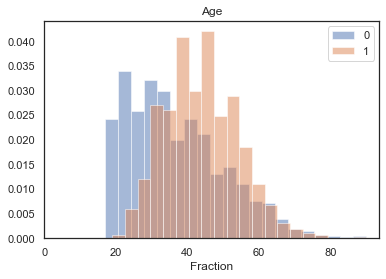

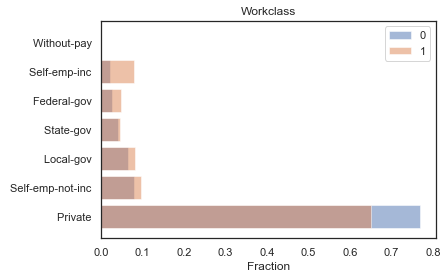

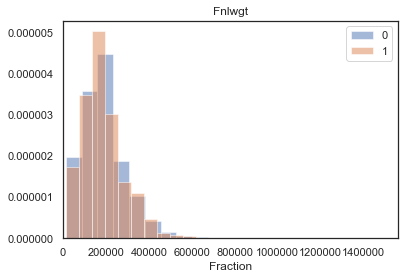

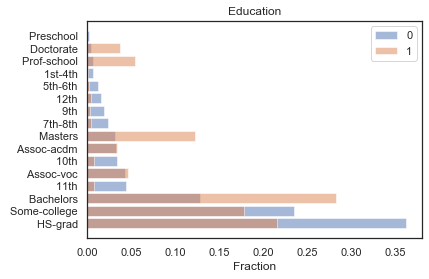

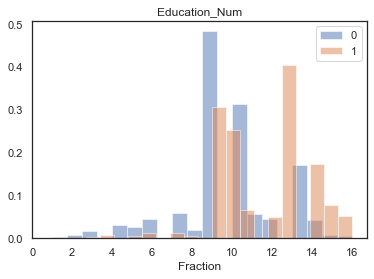

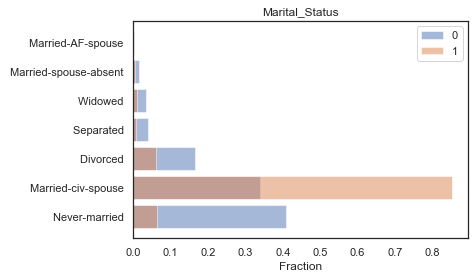

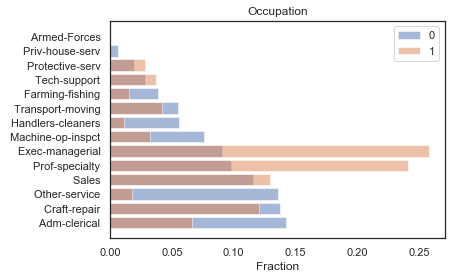

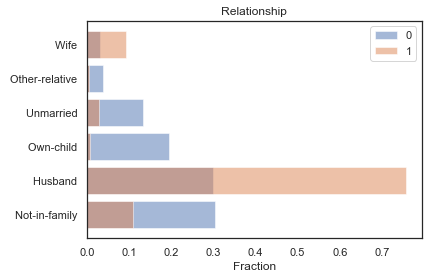

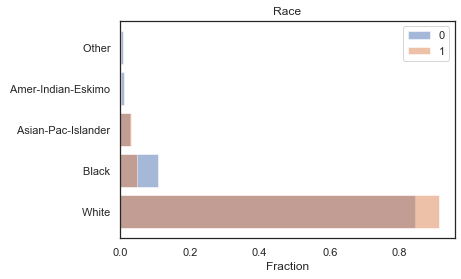

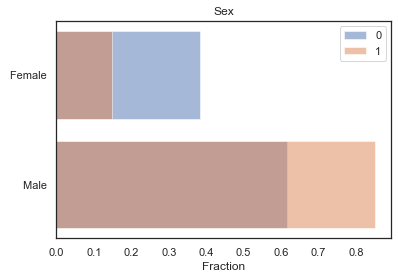

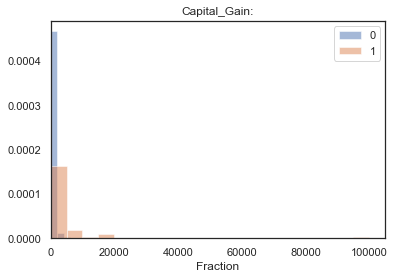

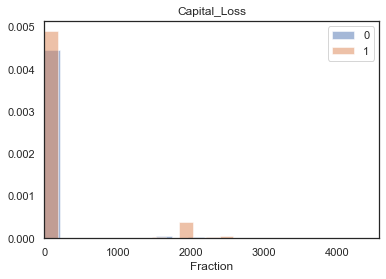

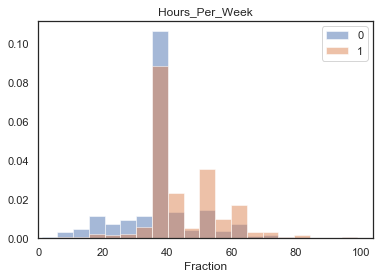

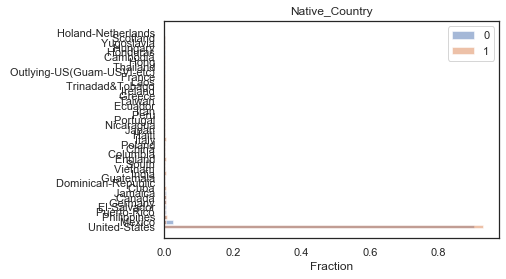

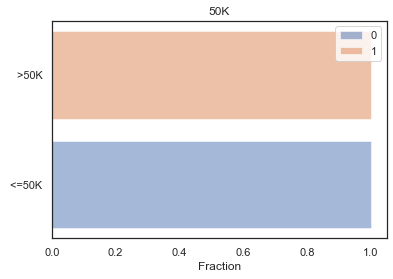

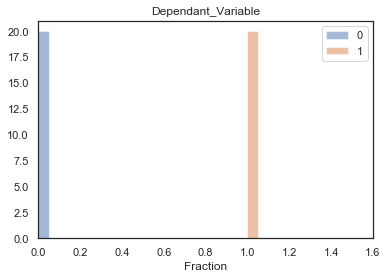

In [279]:
for feature in df.columns:
    salary_50k_false = df.loc[df['dependant_variable'] == 0, 
                              feature]
    salary_50k_true = df.loc[df['dependant_variable'] == 1,
                             feature]
    salary_50k_false_stats = salary_50k_false.value_counts()
    salary_50k_true_stats = salary_50k_true.value_counts()
    
    if feature in num_feat:
        plt.title(feature.title())
        plt.hist(salary_50k_false, 
                 bins=20, 
                 density=True, 
                 alpha=0.5)
        plt.hist(salary_50k_true, 
                 bins=20, 
                 density=True, 
                 alpha=0.5)
        xmin, xmax = plt.xlim()
        plt.xlim(0, xmax)
        
    else: 
        low_bar = plt.barh(
        salary_50k_false_stats.index,
        salary_50k_false_stats.values / salary_50k_false_stats.values.sum(),
        alpha=0.5,
        )
        high_bar = plt.barh(
            salary_50k_true_stats.index,
            salary_50k_true_stats.values / salary_50k_true_stats.values.sum(),
            alpha=0.5,
        )
        
        
#         plt.yticks(np.arange(len(salary_50k_true_stats)), salary_50k_true_stats.index)
        
    plt.xlabel('Fraction')
    plt.legend(df['dependant_variable'].unique())
    plt.title(feature.title())
    plt.show()
        

Observations:

The older the person the more likely it will have higher income

The more years of education person had the more likely it will have higher income.

The more person works the more income this person has.

In [286]:
all_columns = df.columns.tolist()
predictor_columns = list(set(all_columns).difference(['dependant_variable']))

column_frequency = (df
    .groupby(predictor_columns, as_index=False)
    .agg({'dependant_variable': 'nunique'}))

column_frequency[column_frequency.dependant_variable == 2].shape[0]

0

Probably in the real world application we can use the final_weight variable in order to make fuzzy class from the income classes. For example, categories that don't have mixed income classes will be marked with 0 and 1, but other categories can be converted to the continuos probability. Let say 100 people have income <=50K, and 900 have income >50K (for exactly the same set of features) than we can convert income class to 0.9.

Data Exploration Summary and Conclusions
The dataset has five numerical features, eight nominal features and one ordinal feature. The target is a binary variable that is True if the subject's income is less than or equal to $50k, and False otherwise. Based on the exploratory analysis, the following preprocessing steps are needed before building the model:

1) Unknown Values - There are no missing values in the dataset, but three nominal features ('workclass', 'occupation', and 'native-country') have '?' to mark unknown values. Unknown values for 'workclass' and 'occupation' are almost perfectly correlated and seem to signify subjects lacking occupation, which is highly relevant for our prediction task. On the other hand, unknown values for 'native-country' are not correlated with those of the other variables, and may signify data quality issues. Therefore, I will drop rows with unknown 'native-country'.

2) Education Features - 'education' and 'education-num' represent similar information, with the former including nominal text categories (e.g. 'Bachelors') and the latter ordinal categories represented as integers, with a higher number representing higher educational achievement. I will therefore drop 'education', since the information it includes is redundant with that in 'education-num' (but not the other way around!).

3) Superfluous Categories - The categorical features include many categories that have few data examples and, after one-hot-encoding, would result in a cluttered dataset with many features of very little importance. Therefore, I will merge categories that have similar statistical relationships with the target variable.

4) Common Procedures - The data requires scaling (for numerical features) and one-hot-encoding (for nominal features).

The analysis below supports these conclusions and provides further information about the dataset.



In [293]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [294]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [298]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_feat),
    ('category', categorical_pipeline, cat_feat)
])


In [299]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lasso = Lasso(alpha=0.1)

lasso_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lasso)
])

In [300]:
preds = lasso_pipeline.predict(X_valid)

NameError: name 'X_valid' is not defined

In [301]:
mean_absolute_error(y_valid, preds)

NameError: name 'y_valid' is not defined

In [302]:
lasso_pipeline.score(X_valid, y_valid)

NameError: name 'X_valid' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

param_dict = {'model__alpha': np.arange(0, 1, 0.05)}

search = GridSearchCV(lasso_pipeline, param_dict, 
                      cv=10, 
                      scoring='neg_mean_absolute_error')

_ = search.fit(X_train, y_train)

In [289]:
from statsmodels.stats.proportion import proportion_confint

def explore_categorical_feature(var, 
                                df, 
                                target = '<=50K Numeric', 
                                ci_alpha=0.05):
    # This function performs a deeper exploration of the categorical features
    cat_explore = pd.concat([df[var].value_counts(), 
                             df[var].value_counts()/df.shape[0], 
                             df.groupby(var)[target].mean()], 
                            axis=1, 
                            sort=False, 
                            keys=['Count', 
                                  'Share', 
                                  'Positive Rate'])
    cat_explore.index.name = var    
    cat_explore['ci'] = cat_explore.apply(lambda x: proportion_confint(x['Count'] * x['Positive Rate'], 
                                                                       x['Count'],
                                                                       alpha=ci_alpha, 
                                                                       method='jeffreys'),  axis = 1)
    cat_explore['Conf Interval Lower'] = cat_explore['ci'].apply(lambda x: x[0])
    cat_explore['Conf Interval Upper'] = cat_explore['ci'].apply(lambda x: x[1])  
    return cat_explore.drop(['ci'], axis=1).sort_values('Count', ascending = False)
# 

In [291]:
explore_categorical_feature('race', df)

KeyError: 'Column not found: <=50K Numeric'

In [287]:
# Feature importance
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure(figsize=(16, 4))
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

NameError: name 'X' is not defined

In [ ]:
for v in object_variables:
    print(df[v].value_counts())

In [184]:
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, df['50K'], width)
plt.bar(x+0.2, df['50K'], width)

NameError: name 'x' is not defined